In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neural_network, linear_model, svm, tree, cluster, naive_bayes, neighbors, ensemble
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

In [2]:
#Import csv z danymi treningowymi
train = pd.read_csv("train.csv")

In [3]:
#X- Kolumny zawierajace wartosci pixeli
X = train[train.columns[1:]].values
#y- Kolumna zawierajaca etykiety
y = train[train.columns[0]].values

In [4]:
#Zamiana wartości pixeli z 0-255 na 0-7 dla danych treningowych(w celu poprawy wydajnosci)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i][j] < 32:
            X[i][j] = 0
        elif X[i][j] >= 32 and X[i][j] < 64:
            X[i][j] = 1
        elif X[i][j] >= 64 and X[i][j] < 96:
            X[i][j] = 2
        elif X[i][j] >= 96 and X[i][j] < 128:
            X[i][j] = 3
        elif X[i][j] >= 128 and X[i][j] < 160:
            X[i][j] = 4
        elif X[i][j] >= 160 and X[i][j] < 192:
            X[i][j] = 5
        elif X[i][j] >= 192 and X[i][j] < 224:
            X[i][j] = 6
        elif X[i][j] >= 224:
            X[i][j] = 7

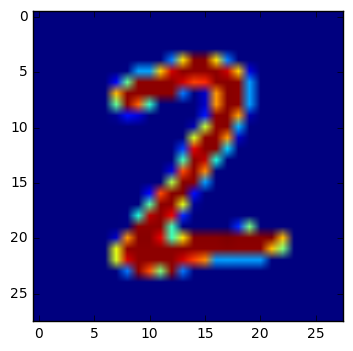

2


In [5]:
#Wyswietlenie cyfry z 22 wiersza
x = train.values[22,1:]
x = np.reshape(x, (28, 28))
plt.imshow(x)
plt.show()
print (train.values[22,0])

In [6]:
#Funkcja train_test_split() losuje, dzieli i zwraca zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = neural_network.MLPClassifier()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1181    0    2    0    4    2    6    2    2    1]
 [   0 1373    4    1    1    1    0    2    6    1]
 [   0   10 1251    6    6    1    2    3   15    0]
 [   1    3    8 1293    0   22    0    9   12    7]
 [   2    0    3    0 1185    2    8    5    1   16]
 [   1    1    0   12    1 1052   10    0    3    5]
 [   5    1    5    0    1    6 1232    2    4    0]
 [   0    2    9    4    6    2    0 1320    3   13]
 [   0    9    7   10    3    7    4    2 1163    4]
 [   5    2    3    5   10    5    1   12    4 1184]]
0.970952380952
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1200
          1       0.98      0.99      0.98      1389
          2       0.97      0.97      0.97      1294
          3       0.97      0.95      0.96      1355
          4       0.97      0.97      0.97      1222
          5       0.96      0.97      0.96      1085
          6       0.98      0.98      0.98      1256
          7       0.97      0

In [8]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1162    0    3    1    2   16   10    0    4    2]
 [   0 1350   10    5    1    6    2    1   13    1]
 [   9   14 1145   28   21   11   19   18   28    1]
 [   7    4   38 1174    4   52    5   17   38   16]
 [   7    5   12    3 1128    4    9    5   11   38]
 [  10    4    9   40   21  930   29    5   26   11]
 [   9    5   11    3   10   14 1192    0   12    0]
 [   3    8   24    6   23    4    1 1244    5   41]
 [  11   24   10   34   14   45    8    2 1040   21]
 [  10    5    5   19   35   16    0   43   13 1085]]
0.90873015873
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1200
          1       0.95      0.97      0.96      1389
          2       0.90      0.88      0.89      1294
          3       0.89      0.87      0.88      1355
          4       0.90      0.92      0.91      1222
          5       0.85      0.86      0.85      1085
          6       0.93      0.95      0.94      1256
          7       0.93      0.

In [9]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1098    1    8   19    5   29   14    3   10   13]
 [   2 1317   13    6    7    7    9    9   15    4]
 [  13   18 1064   41   25   16   30   33   44   10]
 [   8   20   33 1103   17   73   14   25   39   23]
 [   5    9   24    8 1031   11   19   14   38   63]
 [  16   10   15   74   16  856   27    9   38   24]
 [  23    4   12   13   34   20 1101    4   39    6]
 [   7   11   27   19   27    6    8 1198    8   48]
 [  19   27   32   38   28   38   18   22  958   29]
 [   6    3   13   25   60   33    8   44   33 1006]]
0.851746031746
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1200
          1       0.93      0.95      0.94      1389
          2       0.86      0.82      0.84      1294
          3       0.82      0.81      0.82      1355
          4       0.82      0.84      0.83      1222
          5       0.79      0.79      0.79      1085
          6       0.88      0.88      0.88      1256
          7       0.88      0

In [10]:
model = svm.LinearSVC()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1149    0    3    4    3   23   13    0    4    1]
 [   0 1359    5    7    1    6    2    0    7    2]
 [  15   40 1034   47   24   23   19   18   68    6]
 [   6    7   29 1145    7   74    3   17   46   21]
 [   5    7   12    2 1106    8    9    6   14   53]
 [   7    9    9   37   24  940   24    4   23    8]
 [  11    8   24    6   11   35 1148    0   11    2]
 [   4   17   12   12   17   14    0 1188   12   83]
 [  11   33    4   37   19   88    6    0  989   22]
 [   8    7    4   18   42   47    0   41   22 1042]]
0.880952380952
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1200
          1       0.91      0.98      0.95      1389
          2       0.91      0.80      0.85      1294
          3       0.87      0.85      0.86      1355
          4       0.88      0.91      0.89      1222
          5       0.75      0.87      0.80      1085
          6       0.94      0.91      0.93      1256
          7       0.93      0

In [11]:
model = linear_model.SGDClassifier()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1186    0    1    0    1    4    4    0    4    0]
 [   2 1250   13    1    3    5    3    2  108    2]
 [  32    4 1159    8   18    4   16    8   42    3]
 [  33    1   65 1018    3   99    8   11   88   29]
 [  19    1   21    1 1097    9   11    2   19   42]
 [  39    1   17   12   15  922   29    5   33   12]
 [  35    0   14    1    6   17 1176    0    7    0]
 [  14    2   68    4   22   12    0 1173   20   44]
 [  25    7   18   19    8   46   12    1 1066    7]
 [  21    2   30    6   59   41    0   44   74  954]]
0.873095238095
             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1200
          1       0.99      0.90      0.94      1389
          2       0.82      0.90      0.86      1294
          3       0.95      0.75      0.84      1355
          4       0.89      0.90      0.89      1222
          5       0.80      0.85      0.82      1085
          6       0.93      0.94      0.94      1256
          7       0.94      0

In [12]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1077    0    5    2    4   51   32    0   28    1]
 [   0 1334   12    2    0    9    6    0   24    2]
 [  18   19 1077   31   30    8   36   15   57    3]
 [  11   21   56 1085    3   42   14   18   72   33]
 [   1    9    8    0  990    8   19    4   22  161]
 [  28   15    8  146   41  756   33    5   23   30]
 [  22   33   21    2   10   41 1122    0    5    0]
 [   4   34   18    5   39    3    0 1143   20   93]
 [  13   45    8   99   14   30   11    1  944   44]
 [  14   18    8   19   86    6    0   39   33 1008]]
0.83619047619
             precision    recall  f1-score   support

          0       0.91      0.90      0.90      1200
          1       0.87      0.96      0.91      1389
          2       0.88      0.83      0.86      1294
          3       0.78      0.80      0.79      1355
          4       0.81      0.81      0.81      1222
          5       0.79      0.70      0.74      1085
          6       0.88      0.89      0.89      1256
          7       0.93      0.

In [13]:
model = cluster.KMeans(n_clusters=10)
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[ 497    0    2   41   29   44    2  579    6    0]
 [   0  769    0    0    0    2    1    0    0  617]
 [  25   76   13   73   37   48  894    2   36   90]
 [  26   94    9  883  220   12   42    6   42   21]
 [   1   24  406    0    2   39    8    4  680   58]
 [  47   24   64  363  306   28    7   14   66  166]
 [  33   54    1    8   12 1029   18   37   17   47]
 [   2   69  833    1    1    0    9    2  378   64]
 [   6   53   39  240  729   14   12    7   35   74]
 [   5   41  485   19   15    3    2    8  633   20]]
0.179920634921
             precision    recall  f1-score   support

          0       0.77      0.41      0.54      1200
          1       0.64      0.55      0.59      1389
          2       0.01      0.01      0.01      1294
          3       0.54      0.65      0.59      1355
          4       0.00      0.00      0.00      1222
          5       0.02      0.03      0.02      1085
          6       0.02      0.01      0.02      1256
          7       0.00      0

In [14]:
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1176    0    2    4    3    2    6    0    6    1]
 [   0 1369    3    4    1    2    5    2    2    1]
 [   5    5 1202   15   15    4    8   23   14    3]
 [   5    7   27 1222    3   38    5   17   22    9]
 [   2    3    5    3 1154    2    6    4    7   36]
 [   6    3    3   49    9  979    9    3   16    8]
 [  24    3    3    2    8   11 1194    2    9    0]
 [   2    8   26    7   18    2    1 1263    5   27]
 [   1   12   21   38   13   19    9    5 1072   19]
 [  10    1    7   21   37    6    4   25    4 1116]]
0.932301587302
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1200
          1       0.97      0.99      0.98      1389
          2       0.93      0.93      0.93      1294
          3       0.90      0.90      0.90      1355
          4       0.92      0.94      0.93      1222
          5       0.92      0.90      0.91      1085
          6       0.96      0.95      0.95      1256
          7       0.94      0

In [15]:
model = ensemble.ExtraTreesClassifier()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1182    0    3    0    2    3    6    0    4    0]
 [   0 1369    1    5    0    1    5    4    1    3]
 [  11    5 1210   17    9    3    6   14   17    2]
 [   6    5   26 1238    4   24    2   17   22   11]
 [   4    3    4    1 1153    2   11    2    7   35]
 [  10    3    4   34    5  998   14    0   10    7]
 [  18    2    6    1    8   13 1200    0    8    0]
 [   3   11   23    1   15    0    0 1283    3   20]
 [   5    7   20   17   11   20   11    5 1097   16]
 [   8    1    9   25   28   10    4   20   10 1116]]
0.940158730159
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      1200
          1       0.97      0.99      0.98      1389
          2       0.93      0.94      0.93      1294
          3       0.92      0.91      0.92      1355
          4       0.93      0.94      0.94      1222
          5       0.93      0.92      0.92      1085
          6       0.95      0.96      0.95      1256
          7       0.95      0

In [16]:
model = ensemble.AdaBoostClassifier()
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1081    0   14    2    1   55   28    3   10    6]
 [   0 1250   41    7    7    7    5   39   31    2]
 [  29   28  682   25   28   23  315   61   97    6]
 [  25   35   31  929   13   70   51   34  135   32]
 [  10    5   37   19  823   31   13   57   49  178]
 [  16   14   17  220   11  634   37   12   99   25]
 [  24   16   78   12   35   56  989    1   42    3]
 [  30   15   33   22   38    9    0 1050   15  147]
 [  15   60   38  106   15   44    9   23  876   23]
 [  10   12   45   72  289   23    3  103   33  641]]
0.710714285714
             precision    recall  f1-score   support

          0       0.87      0.90      0.89      1200
          1       0.87      0.90      0.89      1389
          2       0.67      0.53      0.59      1294
          3       0.66      0.69      0.67      1355
          4       0.65      0.67      0.66      1222
          5       0.67      0.58      0.62      1085
          6       0.68      0.79      0.73      1256
          7       0.76      0

In [17]:
#Dopracowanie najlepszego klasyfikatora
model = neural_network.MLPClassifier(max_iter=100000, hidden_layer_sizes=(1000, ))
model.fit(X_train, y_train)
test = model.predict(X_test)
print (confusion_matrix(y_test, test))
print (accuracy_score(y_test, test))
print (classification_report(y_test, test))
print (precision_score(y_test, test,average=None))

[[1185    0    3    0    1    0    5    2    3    1]
 [   0 1376    3    2    1    1    0    2    4    0]
 [   1    5 1266    5    4    0    2    3    6    2]
 [   2    2    8 1310    0   12    0    4   10    7]
 [   3    0    2    0 1192    1    8    3    1   12]
 [   0    1    0   12    0 1062    5    1    2    2]
 [   4    2    2    0    2    4 1236    1    5    0]
 [   0    2    8    1    6    2    0 1325    2   13]
 [   1    6    7    5    4    4    1    2 1178    1]
 [   3    0    2    5    6    4    1    6    2 1202]]
0.97873015873
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1200
          1       0.99      0.99      0.99      1389
          2       0.97      0.98      0.98      1294
          3       0.98      0.97      0.97      1355
          4       0.98      0.98      0.98      1222
          5       0.97      0.98      0.98      1085
          6       0.98      0.98      0.98      1256
          7       0.98      0.

In [18]:
#Import danych testowych
test = pd.read_csv("test.csv")

In [19]:
#Zamiana wartości pixeli z 0-255 na 0-7 dla danych testowych(w celu poprawy wydajnosci)
X_test = test.values
for i in range(X_test.shape[0]):
    for j in range(X_test.shape[1]):
        if X_test[i][j] < 32:
            X_test[i][j] = 0
        elif X_test[i][j] >= 32 and X_test[i][j] < 64:
            X_test[i][j] = 1
        elif X_test[i][j] >= 64 and X_test[i][j] < 96:
            X_test[i][j] = 2
        elif X_test[i][j] >= 96 and X_test[i][j] < 128:
            X_test[i][j] = 3
        elif X_test[i][j] >= 128 and X_test[i][j] < 160:
            X_test[i][j] = 4
        elif X_test[i][j] >= 160 and X_test[i][j] < 192:
            X_test[i][j] = 5
        elif X_test[i][j] >= 192 and X_test[i][j] < 224:
            X_test[i][j] = 6
        elif X_test[i][j] >= 224:
            X_test[i][j] = 7

In [20]:
#Stworzenie modelu sieci neuronowej z maksymalna liczba iteracji 100 000 i z 1 000 ukrytych warstw
model = neural_network.MLPClassifier(max_iter=100000, hidden_layer_sizes=(1000, ))
#Uczenie sieci neuronowej
model.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
#Klasyfikacja danych testowych
test = model.predict(X_test)

In [22]:
#Zapis do CSV
dfTest = pd.DataFrame(test)
dfTest.index += 1
dfTest.to_csv("testPredict.csv")